<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/Titanic_DScalabrini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
cd gdrive/My\ Drive/ 

/content/gdrive/My Drive


In [ ]:
ls kaggle.json 

kaggle.json


In [ ]:
ls -l *kaggle*

-rw------- 1 root root 73 Apr 13 15:12 kaggle.json


In [ ]:
!chmod 600 kaggle.json

In [ ]:
ls -l *kaggle*

-rw------- 1 root root 73 Apr 13 15:12 kaggle.json


In [ ]:
envs=json.load(open("kaggle.json","r"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]
!kaggle --version
!kaggle datasets list

#environ fissa le enviromental variables







Kaggle API 1.5.13
401 - Unauthorized


In [ ]:
!kaggle datasets list -s titanic

401 - Unauthorized


In [ ]:
cd MLPNS_2023

/content/gdrive/MyDrive/MLPNS_2023


In [ ]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


In [ ]:
cd kaggleTitanic

/content/gdrive/MyDrive/MLPNS_2023/kaggleTitanic


In [ ]:
!kaggle competitions download -c titanic

401 - Unauthorized


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [41]:
titanic=pd.read_csv("train.csv")
titanic

#noi dividiamo il train test in un test set e un train set. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
titanic = titanic[['Pclass', 'Sex', 'Age']]
titanic.shape

#teniamo solo le colonne indicate
#Survived è la target variable

(891, 3)

In [44]:
titanic.describe()
#controllo per missing data; 
#Titanic.describe salta il gender, perche non è una variabile numerica ma categorica. 

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [45]:
titanic["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [46]:
titanic.dropna(inplace=True)
#axis=0; 
#avrei potuto usare fillna ( riempe i valori mancanti con dei valori di mia scelta )
#avremo potuto usare anche il knn per riempire le caselle mancanti; 

In [47]:
titanic.describe


<bound method NDFrame.describe of      Pclass     Sex   Age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
885       3  female  39.0
886       2    male  27.0
887       1  female  19.0
889       1    male  26.0
890       3    male  32.0

[714 rows x 3 columns]>

In [48]:
titanic['gender']=titanic['Sex'].map({'male':0,'female':1})
#gli passo un dictionary; 
type(titanic['gender'])

#anche se i tree method usano anche variabili categoriche, è meglio usare variabili numeriche; 

pandas.core.series.Series

In [49]:
titanic

,Pclass,Sex,Age,gender
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
885,3,female,39.0,1
886,2,male,27.0,0
887,1,female,19.0,1
889,1,male,26.0,0


In [55]:
titanic.drop('Sex', axis=1, inplace=True)
#ho tolto sex, che è ridondante ora; 

In [50]:
titanic.drop?

In [59]:
titanic
#osserviamo come non abbiamo fatto whitening. Non sto valutando una distance e non sto
#mettendo i dati insieme in una formula. Se ho delle variabili correlate che allora danno 
#le stesse info, una delle due variabili diventa inutile. Il problema si pone se voglio studiare
#se certe variabili sono importanti. 

,Pclass,Age,gender
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,1
886,2,27.0,0
887,1,19.0,1
889,1,26.0,0


In [60]:
titanic_target = pd.read_csv("train.csv")[["Survived", 
                                           "Pclass",	"Sex",	"Age"]].dropna()
titanic_target

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [61]:
titanic_target = titanic_target['Survived']


In [69]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,random_state=222)

In [70]:
clf.fit(titanic.values, titanic_target.values)
#in un supervised learning abbiamo bisogno della x e della y.

DecisionTreeClassifier(max_depth=5, random_state=222)

In [71]:
clf.score(titanic.values, titanic_target.values)
#dice l'accuracy del modello 
#per oggi non abbiamo ancora diviso tra train e test set; 


0.8263305322128851

In [73]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data)

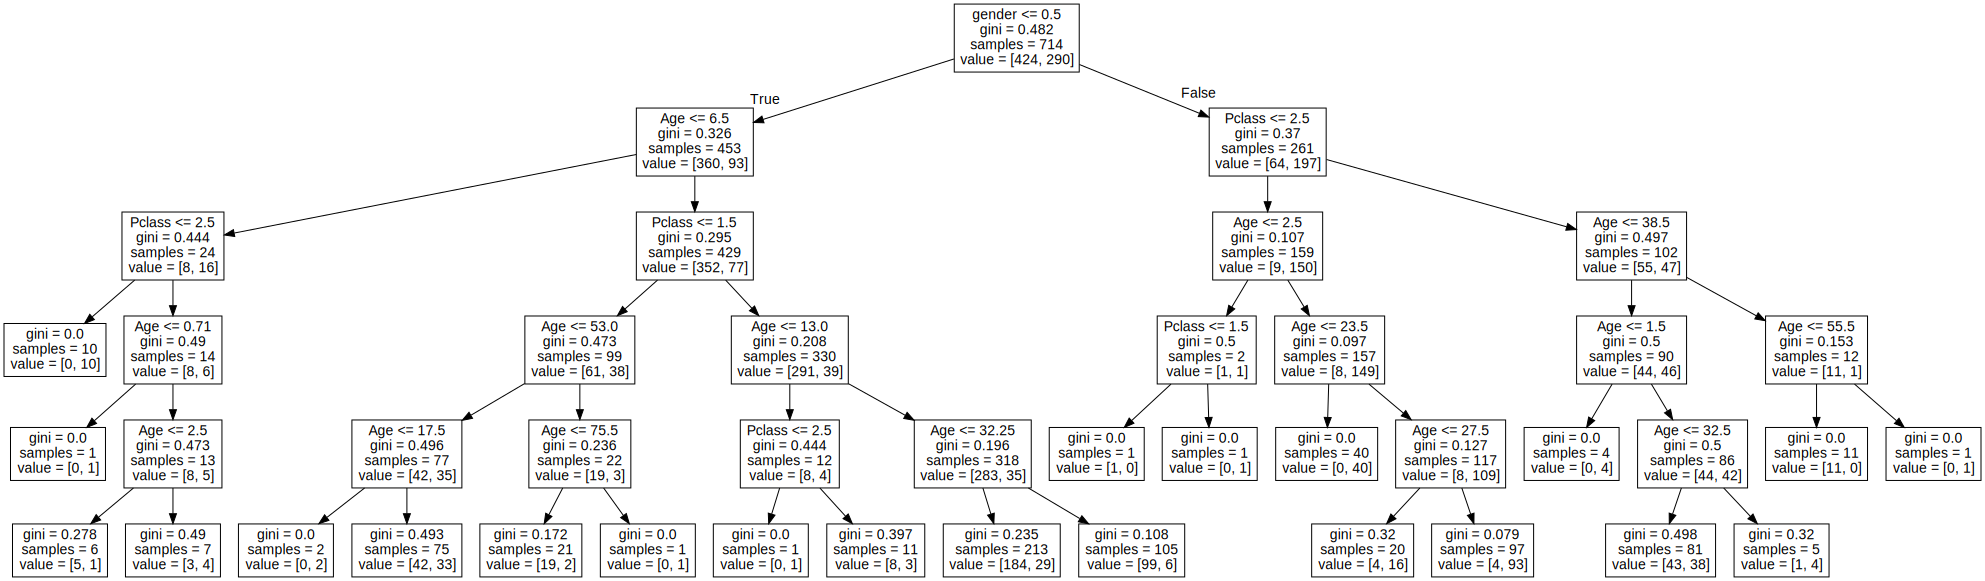

In [74]:
graph

In [ ]:
#ho un alto score. Rischio però overfitting. Setto la depth dell'albero. 
#come vedo si abbassa lo score, ma non so se c'è un guadagno dal punto di vista del overfitting
#Per vedere se ho overfittin devo fare train test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test=train_test_split(titanic.values, titanic_target.values, test_size=0.2)

In [77]:
clf.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=5, random_state=222)

In [78]:
clf.score(X_train, y_train)

0.851138353765324

In [79]:
clf.score(X_test, y_test)

0.7342657342657343

In [80]:
#Se lo score_train > score_test in modo significativo allora ho overfitting. 

In [81]:
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=222)

In [82]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=222)

In [83]:
clf2.score(X_train, y_train)

0.8161120840630472

In [85]:
clf2.score(X_test, y_test)

0.7972027972027972

In [86]:
#ho diminuito l'accuracy, ma ho risolto l'overfitting. 


In [91]:
clf0 = tree.DecisionTreeClassifier( random_state=222)

In [92]:
clf0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=222)

In [93]:
clf0.score(X_train, y_train)

0.8949211908931699

In [94]:
clf0.score(X_test, y_test)

0.8111888111888111